In [1]:
from UTILITY_quickstart import *

importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch.yml")

csrTF = True


inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"]
bunchCount = importedDefaultSettings["bunchCount"]
tao = initializeTao(
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,
    
    csrTF = csrTF,
    numMacroParticles=1e4,
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR on
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 10000.0


Loaded activeBeamFile.h5
Set track_start = L0AFEND, track_end = end
Set track_end = BEGBC14_1
Tracking!
Also setting BC14 energy = 4.5 GeV, from 4.4143457369233055 GeV
Beam centered at BEGBC14 written to patchBeamFile.h5
Loaded patchBeamFile.h5
Set track_start = BEGBC14_1, track_end = end
Set track_end = BEGBC20
Tracking!
Also setting BC20 energy = 10.0 GeV, from 9.921640941706166 GeV
Beam centered at BEGBC20 written to patchBeamFile.h5
Loaded patchBeamFile.h5
Set track_start = BEGBC20, track_end = end
Set track_end = MFFF
Tracking!
Beam centered at MFFF written to patchBeamFile.h5
Loaded patchBeamFile.h5
Set track_start = MFFF, track_end = end
Tracking!
trackBeam() exiting


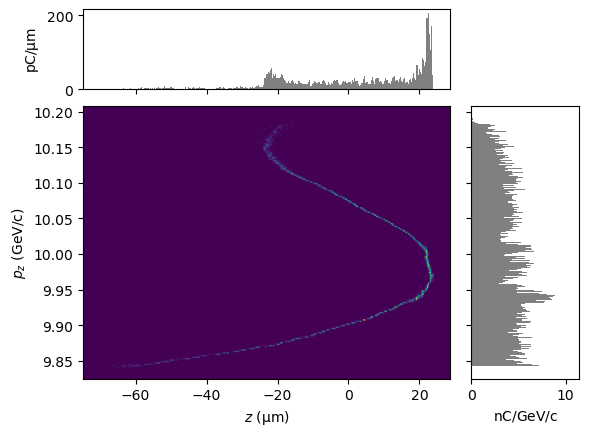

{'PDrive_median_x': -2.8625606137975134e-06,
 'PDrive_median_y': 1.9048627410823136e-06,
 'PDrive_median_xp': 3.7486840555322205e-07,
 'PDrive_median_yp': 6.691085801448836e-07,
 'PDrive_sigmaSI90_x': 1.993358838422092e-05,
 'PDrive_sigmaSI90_y': 1.1559749565315982e-05,
 'PDrive_sigmaSI90_z': 1.443029876258024e-05,
 'PDrive_sigmaSI90_xp': 5.8601855310477246e-05,
 'PDrive_sigmaSI90_yp': 2.0519371549016578e-05,
 'PDrive_emitSI90_x': 2.223564652895447e-05,
 'PDrive_emitSI90_y': 3.285161325364829e-06,
 'PDrive_norm_emit_x': 3.7070063735552754e-05,
 'PDrive_norm_emit_y': 5.8801753196977146e-06,
 'PDrive_charge_nC': 1.599360000000001}

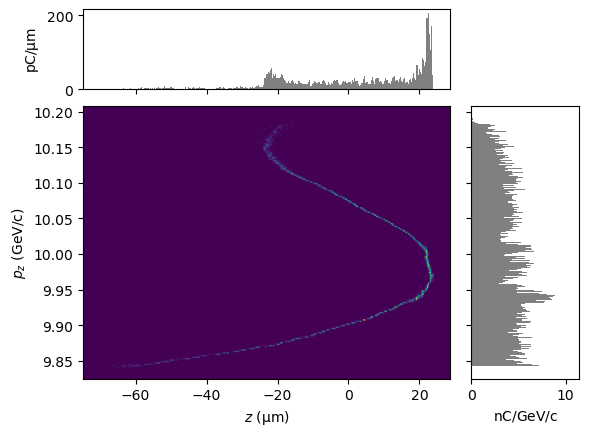

In [2]:
setLattice(tao, **importedDefaultSettings)

trackBeam(tao, 
          **importedDefaultSettings,
          verbose = True
         )

P = getBeamAtElement(tao, "PENT")
display(plotMod(P, 'z', 'pz', bins=300))
getBeamSpecs(P)

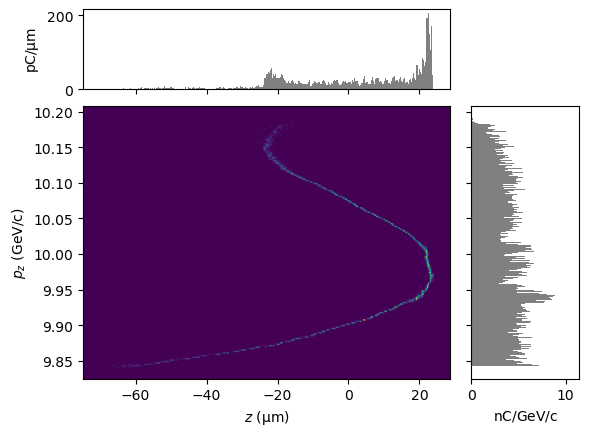

{'PDrive_median_x': -2.862560478106635e-06,
 'PDrive_median_y': 1.9048628180917173e-06,
 'PDrive_median_xp': 3.748684059142575e-07,
 'PDrive_median_yp': 6.691085454619699e-07,
 'PDrive_sigmaSI90_x': 1.9933588251325682e-05,
 'PDrive_sigmaSI90_y': 1.155974964548905e-05,
 'PDrive_sigmaSI90_z': 1.443029876258024e-05,
 'PDrive_sigmaSI90_xp': 5.860185534558555e-05,
 'PDrive_sigmaSI90_yp': 2.051937151958974e-05,
 'PDrive_emitSI90_x': 2.2235646871403685e-05,
 'PDrive_emitSI90_y': 3.285161304302692e-06,
 'PDrive_norm_emit_x': 3.707006373130962e-05,
 'PDrive_norm_emit_y': 5.880175321278194e-06,
 'PDrive_charge_nC': 1.599360000000001}

In [3]:
# Sanity check checkpoint load
PMFFF = getBeamAtElement(tao, "MFFF")

makeBeamActiveBeamFile(PMFFF)

trackBeam(tao, 
          trackStart = "MFFF",
          **importedDefaultSettings
         )

P = getBeamAtElement(tao, "PENT")
display(plotMod(P, 'z', 'pz', bins=300))
getBeamSpecs(P)

In [4]:
def getSpotRatio(verbose = False):      
        tao.cmd(f"set ele XTCAVF VOLTAGE = 0")
        trackBeam(tao, trackStart = "MFFF")
        P = getBeamAtElement(tao, "DTOTR")
        spotOFF = smallestIntervalImpliedSigma( P.x ) 

        if verbose:
            display(plotMod(P, 'x', 'y', bins=300))
            display(plotMod(P, 'z', 'x', bins=300))


        tao.cmd(f"set ele XTCAVF VOLTAGE = 10e6")
        trackBeam(tao, trackStart = "MFFF")
        P = getBeamAtElement(tao, "DTOTR") 
        spotON = smallestIntervalImpliedSigma( P.x ) 

        if verbose:
            display(plotMod(P, 'x', 'y', bins=300))
            display(plotMod(P, 'z', 'x', bins=300))

        return spotON / spotOFF

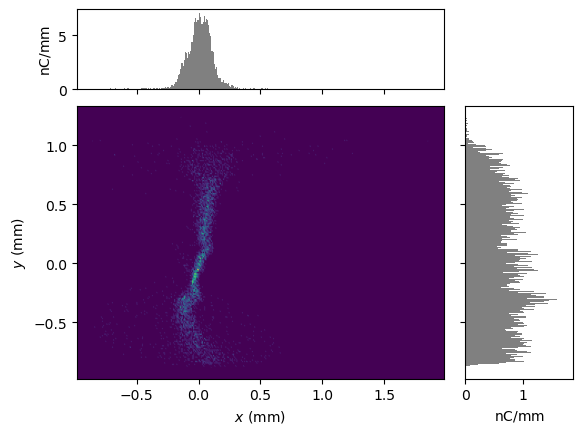

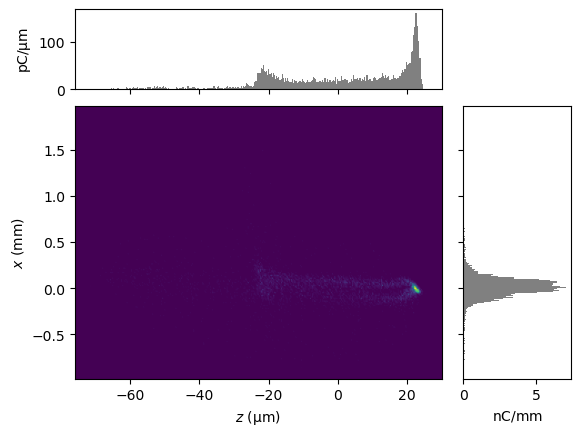

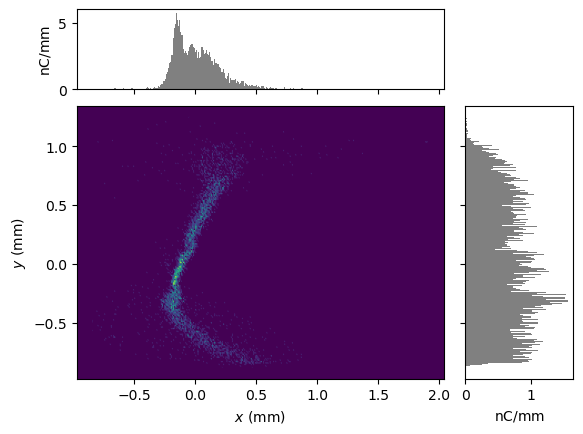

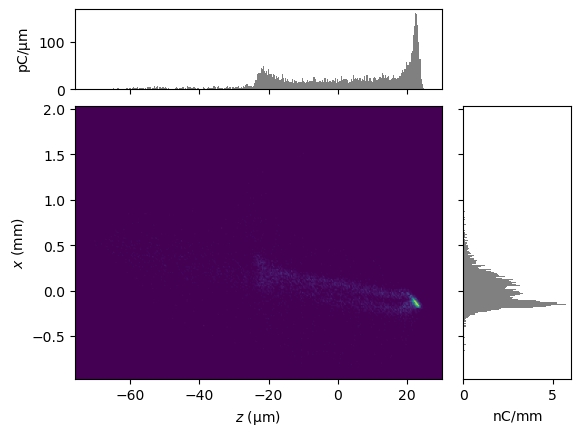

1.6050547018468695

In [5]:
getSpotRatio( verbose = True )

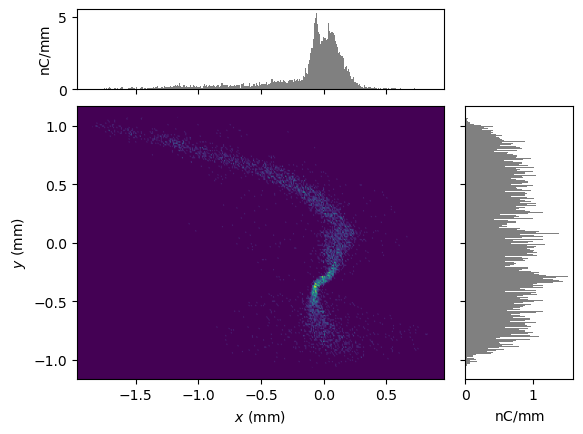

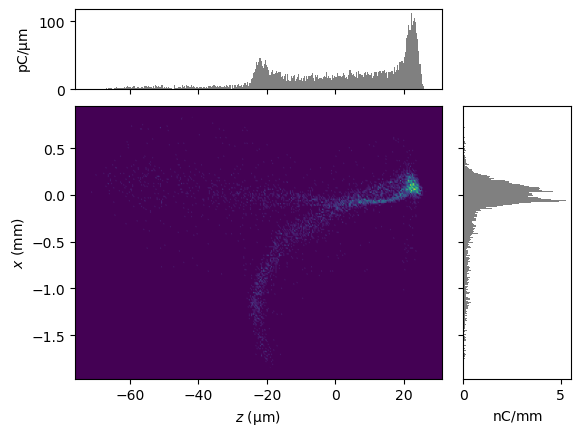

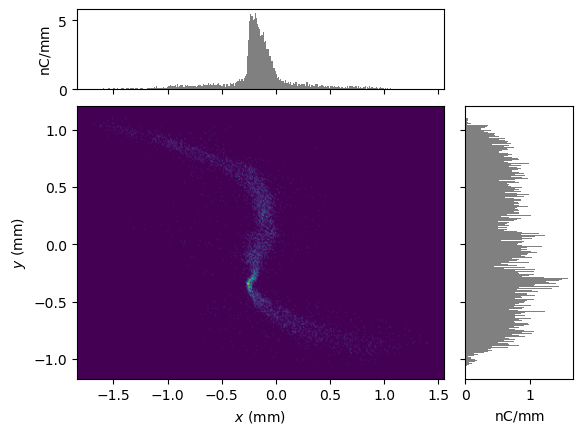

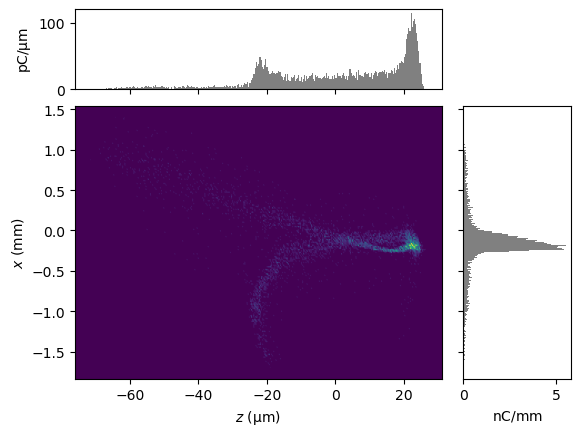

1.1772990569177344

In [6]:
#S20 configurator TCAV optics: https://docs.google.com/presentation/d/1pEDyfRYzVhJpeqzpDUfJOKxTxE6_achOUj4SHY-MoQQ/edit#slide=id.g2f39098462d_0_5

setQuadkG(tao, "Q5FF", -192)
setQuadkG(tao, "Q4FF", -162)
setQuadkG(tao, "Q3FF", 105)
setQuadkG(tao, "Q2FF", 120)
setQuadkG(tao, "Q1FF", -209)
setQuadkG(tao, "Q0FF", 120)
setQuadkG(tao, "Q0D", -139)
setQuadkG(tao, "Q1D", 225)
setQuadkG(tao, "Q2D", -139)


getSpotRatio( verbose = True )

## Optimize

In [14]:
setLattice(tao, **( importedDefaultSettings | {'Q5FFkG': -96.80709760989095,
 'Q4FFkG': -49.40617177928732,
 'Q3FFkG': 62.33044209259725,
 'Q2FFkG': 103.81568191888222,
 'Q1FFkG': -125.41116422014828,
 'Q0FFkG': 12.562130639402042,
 'Q0DkG': -86.4925895347894,
 'Q1DkG': 149.55261928614215,
 'Q2DkG': -178.325118039556}) )

In [ ]:
from scipy.optimize import minimize
from scipy.optimize import differential_evolution

def objective(params, tao):
    Q5FFkG, Q4FFkG, Q3FFkG, Q2FFkG, Q1FFkG, Q0FFkG, Q0DkG, Q1DkG, Q2DkG  = params
    
    try:
        #Prevent recalculation until changes are made
        tao.cmd("set global lattice_calc_on = F")
        
        setQuadkG(tao, "Q5FF", Q5FFkG)
        setQuadkG(tao, "Q4FF", Q4FFkG)
        setQuadkG(tao, "Q3FF", Q3FFkG)
        setQuadkG(tao, "Q2FF", Q2FFkG)
        setQuadkG(tao, "Q1FF", Q1FFkG)
        setQuadkG(tao, "Q0FF", Q0FFkG)
        setQuadkG(tao, "Q0D", Q0DkG)
        setQuadkG(tao, "Q1D", Q1DkG)
        setQuadkG(tao, "Q2D", Q2DkG)

            
        #Reenable lattice calculations
        tao.cmd("set global lattice_calc_on = T")

        spotRatio = getSpotRatio()

        print(f"{spotRatio:.2f}: {params}")





    
    
    except: #If Bmad doesn't like the proposed solution, don't crash, give a bad number
        return 1e20


    
    return -1 * ( spotRatio ) 


def solver(
    tao,
    verbose = False
):


    quadNameList = ["Q5FF", "Q4FF", "Q3FF", "Q2FF", "Q1FF", "Q0FF", "Q0D", "Q1D", "Q2D"] 
    initialGuess = [getQuadkG(tao, name) for name in quadNameList]

    #For now, just hardcoding bounds... could generalize if required
    #From "bounds.yml" as of 2025-01-10-11-11-35
    # Q5FFkGBounds: (-256, 0)  #BCON = -70
    # Q4FFkGBounds: (-446, 0)  #BCON = -71
    # Q3FFkGBounds: (0, 457)   #BCON = 106
    # Q2FFkGBounds: (0, 167)   #BCON = 112
    # Q1FFkGBounds: (-257, 0)  #BCON = -225
    # Q0FFkGBounds: (0, 167)   #BCON = 112
    # Q0DkGBounds : (-239, 0)  #BCON = -112
    # Q1DkGBounds : (0, 386)   #BCON = 177
    # Q2DkGBounds : (-223, 0)  #BCON = -112

    bounds = [(-256,0), (-446,0), (0,457), (0,167), (-257,0), (0,167), (-239,0), (0,386), (-223,0)]


    # Perform optimization using Nelder-Mead
    result = minimize(
        objective, 
        initialGuess, 
        method='Nelder-Mead',
        #method='powell',
        bounds = bounds,
        args = (tao),
        options = {"maxiter" : 500}
    )

    # result = differential_evolution(
    #     objective, 
    #     bounds,
    #     args = (tao, ),#comma is required!
    #     maxiter = 10,
    #     popsize = 5,
    #     polish = False
    # )

    # #Apply best result to the lattice
    # betaSetX, alphaSetX, betaSetY, alphaSetY = result.x
    
    # #Prevent recalculation until changes are made
    # tao.cmd("set global lattice_calc_on = F")
    
    # tao.cmd(f"set element beginning beta_a = {betaSetX}")
    # tao.cmd(f"set element beginning alpha_a = {alphaSetX}")
    # tao.cmd(f"set element beginning beta_b = {betaSetY}")
    # tao.cmd(f"set element beginning alpha_b = {alphaSetY}")
    
    # #Reenable lattice calculations
    # tao.cmd("set global lattice_calc_on = T")

    if verbose:
        print("Optimization Results:")
        print(f"Optimal Parameters: {result.x}")
        print(f"Objective Function Value at Optimal Parameters: {result.fun}")
        print(f"Number of Iterations: {result.nit}")
        print(f"Converged: {result.success}")

    quadVariableNameList = ["Q5FFkG", "Q4FFkG", "Q3FFkG", "Q2FFkG", "Q1FFkG", "Q0FFkG", "Q0DkG", "Q1DkG", "Q2DkG"] 

    
    
    return { quadVariableNameList[i] : result.x[i] for i in range(len(quadVariableNameList)) }

sol = solver(tao, verbose = True)
sol

1.92: [ -96.80709761  -49.40617178   62.33044209  103.81568192 -125.41116422
   12.56213064  -86.49258953  149.55261929 -178.32511804]
1.76: [-101.64745249  -49.40617178   62.33044209  103.81568192 -125.41116422
   12.56213064  -86.49258953  149.55261929 -178.32511804]
1.59: [ -96.80709761  -51.87648037   62.33044209  103.81568192 -125.41116422
   12.56213064  -86.49258953  149.55261929 -178.32511804]
1.94: [ -96.80709761  -49.40617178   65.4469642   103.81568192 -125.41116422
   12.56213064  -86.49258953  149.55261929 -178.32511804]
1.27: [ -96.80709761  -49.40617178   62.33044209  109.00646601 -125.41116422
   12.56213064  -86.49258953  149.55261929 -178.32511804]
0.99: [ -96.80709761  -49.40617178   62.33044209  103.81568192 -131.68172243
   12.56213064  -86.49258953  149.55261929 -178.32511804]
2.00: [ -96.80709761  -49.40617178   62.33044209  103.81568192 -125.41116422
   13.19023717  -86.49258953  149.55261929 -178.32511804]
1.33: [ -96.80709761  -49.40617178   62.33044209  103.8

In [ ]:
setLattice(tao, **(importedDefaultSettings | sol ) ) 
getSpotRatio( verbose = True )